# <a id='toc1_'></a>[$$ ASSIGNMENT-2 $$](#toc0_)

---

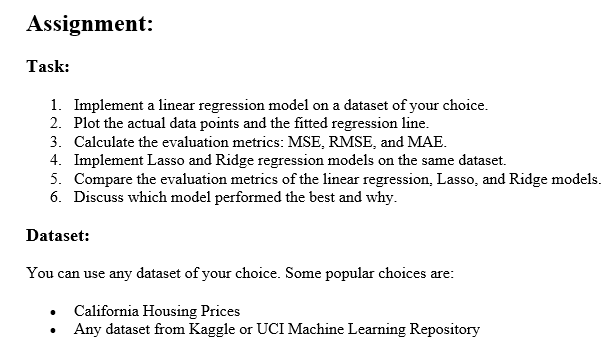

---

## **Table of contents**<a id='toc0_'></a>    
 [$$ ASSIGNMENT-2 $$](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Load the California Housing Prices dataset](#toc1_2_)    
  - [Implement a linear regression model](#toc1_3_)    
    - [Split the dataset into training and testing sets](#toc1_3_1_)    
    - [Initialize and fit the linear regression model](#toc1_3_2_)    
  - [Plot the actual data points and the fitted regression line](#toc1_4_)    
  - [Calculate the evaluation metrics: MSE, RMSE, and MAE](#toc1_5_)    
  - [Implement Lasso and Ridge regression models on the same dataset](#toc1_6_)    
    - [Lasso regression model](#toc1_6_1_)    
    - [Ridge regression model](#toc1_6_2_)    
  - [Discuss which model performed the best and why](#toc1_7_)    
  - [Conclusion](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.metrics import mean_squared_error, mean_absolute_error

except:
    !pip install pandas
    !pip install numpy
    !pip install scikit-learn
    !pip install scipy
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.datasets import fetch_california_housing
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge
    from sklearn.metrics import mean_squared_error, mean_absolute_error

---

## <a id='toc1_2_'></a>[Load the California Housing Prices dataset](#toc0_)

In [2]:
data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


---

## <a id='toc1_3_'></a>[Implement a linear regression model](#toc0_)

### <a id='toc1_3_1_'></a>[Split the dataset into training and testing sets](#toc0_)

In [5]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <a id='toc1_3_2_'></a>[Initialize and fit the linear regression model](#toc0_)

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict on the test set
y_pred_linear = linear_regression.predict(X_test)


---

## <a id='toc1_4_'></a>[Plot the actual data points and the fitted regression line](#toc0_)


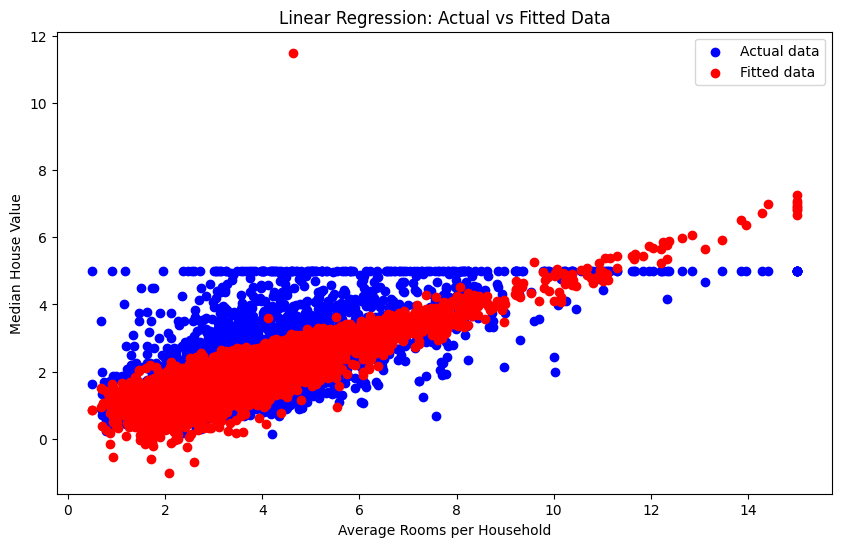

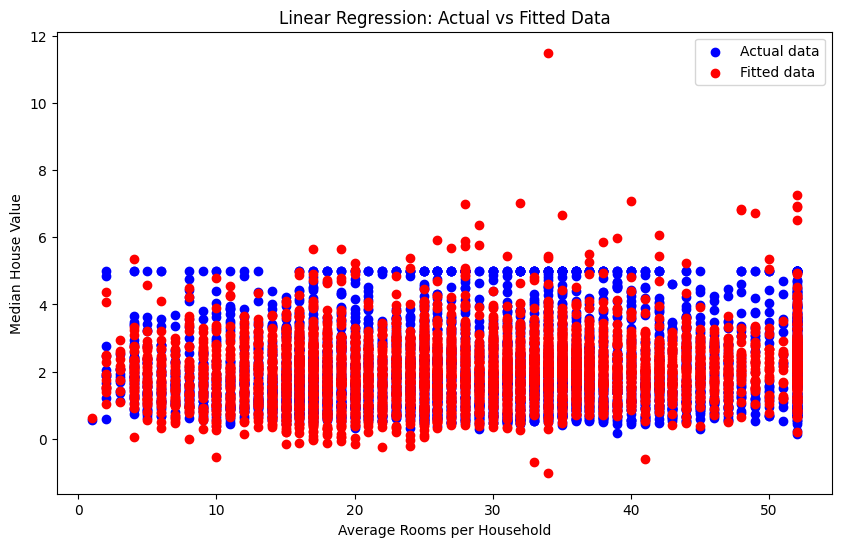

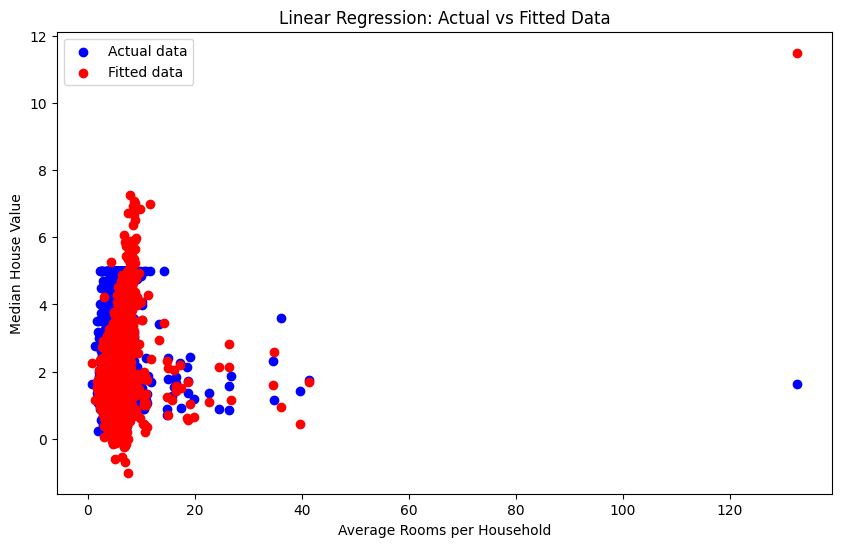

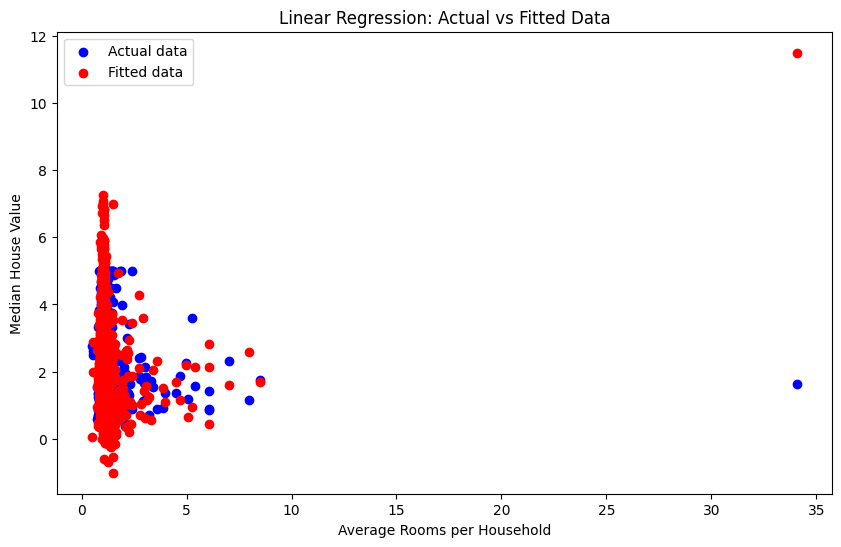

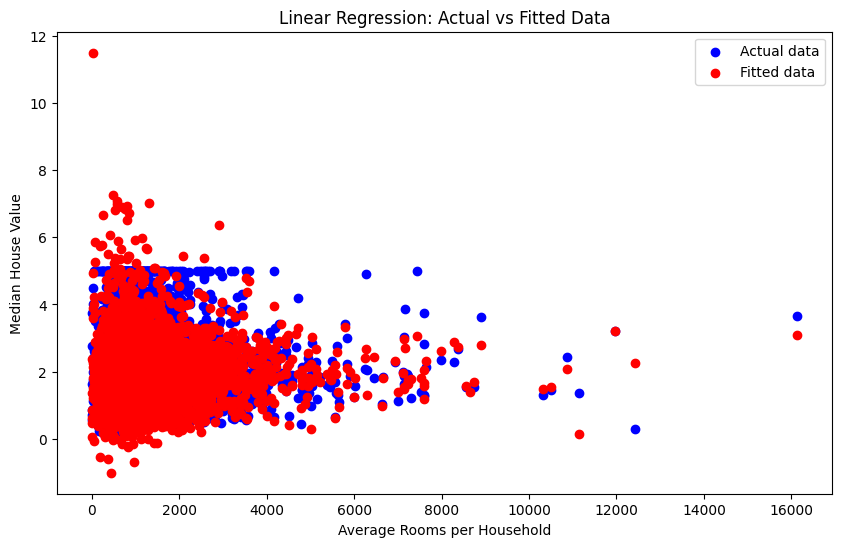

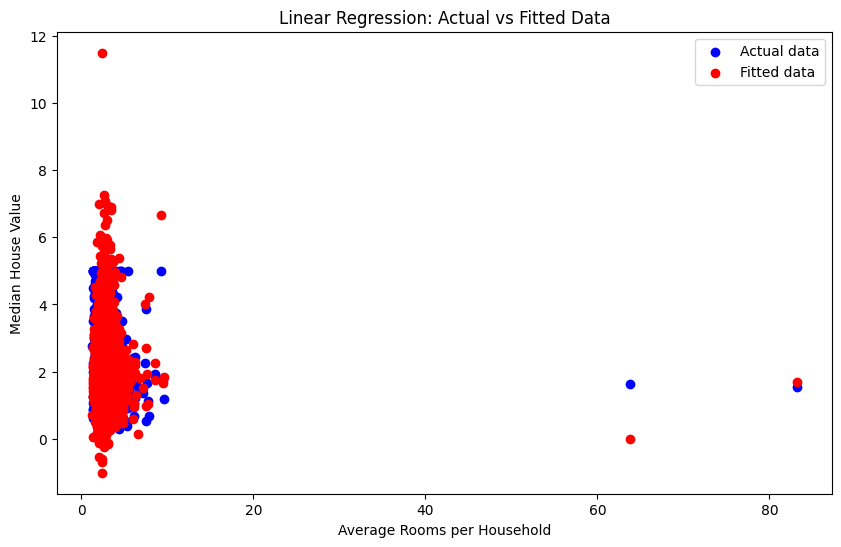

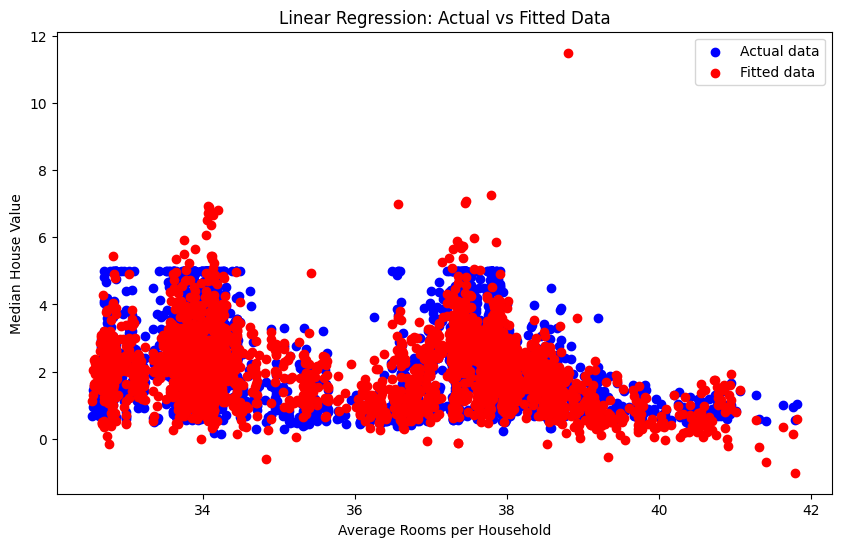

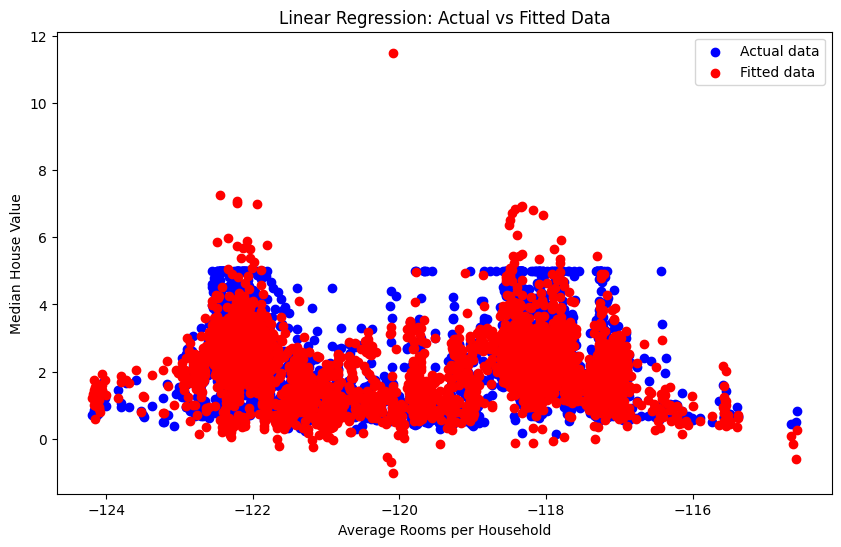

In [8]:
for i in data.feature_names:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[i], y_test, color='blue', label='Actual data')
    plt.scatter(X_test[i], y_pred_linear, color='red', label='Fitted data')
    plt.xlabel('Average Rooms per Household')
    plt.ylabel('Median House Value')
    plt.title('Linear Regression: Actual vs Fitted Data')
    plt.legend()
    plt.show()

---

## <a id='toc1_5_'></a>[Calculate the evaluation metrics: MSE, RMSE, and MAE](#toc0_)

In [9]:
# Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
# Root Mean Squared Error
rmse_linear = np.sqrt(mse_linear)
# Mean Absolute Error
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"""Linear Regression:
    - MSE: {mse_linear}
    - RMSE: {rmse_linear}
    - MAE: {mae_linear}""")


Linear Regression:
    - MSE: 0.555891598695244
    - RMSE: 0.7455813830127761
    - MAE: 0.5332001304956558


---

## <a id='toc1_6_'></a>[Implement Lasso and Ridge regression models on the same dataset](#toc0_)


### <a id='toc1_6_1_'></a>[Lasso regression model](#toc0_)

In [10]:
# Initialize and fit the Lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [11]:
# Lasso Regression Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"""Lasso Regression:
    - MSE: {mse_lasso}
    - RMSE: {rmse_lasso}
    - MAE: {mae_lasso}""")

Lasso Regression:
    - MSE: 0.9380337514945428
    - RMSE: 0.9685214254184276
    - MAE: 0.7615782541669575


---

### <a id='toc1_6_2_'></a>[Ridge regression model](#toc0_)

In [12]:
# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [13]:
# Ridge Regression Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"""Ridge Regression:
    - MSE: {mse_ridge}
    - RMSE: {rmse_ridge}
    - MAE: {mae_ridge}""")

Ridge Regression:
    - MSE: 0.5558034669932209
    - RMSE: 0.7455222779992701
    - MAE: 0.5332039182571162


---


## <a id='toc1_7_'></a>[Discuss which model performed the best and why](#toc0_)

In [14]:

# Summarize the evaluation metrics for comparison
metrics = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [mse_linear, mse_lasso, mse_ridge],
    'RMSE': [rmse_linear, rmse_lasso, rmse_ridge],
    'MAE': [mae_linear, mae_lasso, mae_ridge]
}
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,MSE,RMSE,MAE
0,Linear Regression,0.555892,0.745581,0.533200
1,Lasso Regression,0.938034,0.968521,0.761578
2,Ridge Regression,0.555803,0.745522,0.533204


---

## <a id='toc1_8_'></a>[Conclusion](#toc0_)

***We can conclude that Linear regression and Ridge Regression was almost given same values. By considering above values, we generally consider the best model with the lowest lowest MSE, RMSE, and MAE***